### Závěrečný projekt - modul Python

V tomto projektu budete analyzovat data ze stránky `www.sreality.cz`. Budete tedy získávat aktuální nabídku bytů ve Zlíně.
Projekt se dělí na 2 části:
1. WebScraping - pomocí knihovny `BeautifulSoup` získejte všechny aktuální inzerce bytů v daném městě. 
- Získáte **tyto** informace: `URL odkaz bytu, rozměry bytu, kompozice bytu, cena bytu, lokace bytu (Ulice+město)`
2. Datová analýza - ETL proces
- V první fázi prověďte processing dat tak, aby obsahovala příslušné datové typy, nenulové hodnoty atp. Ulice i město bude v samostatných sloupcích.
- Zprocesovaná a vyčištěná data vyexportujte do `.csv` souboru s názvem `{vašeJméno}_zdrojová_data.csv`
3. Datová analýza - analýza dat
- Třetí část začněte tak, že si do dataframe nahrajete vámi vyexportovaný `.csv` soubor s vyscrapovanými daty.
- Ve druhé fázi proveďte analýzu dat a odpovězte na tyto dotazy:
- `Jaká je průměrná cena bytů?`
- `Jaká je průměrná cena bytů pro každou kompozici (1+1, 2+1, atp.)? Zobrazte i na grafu.`
- `Jaká je průměrná velikost bytu pro každou kompozici?`
- `Existuje ulice, kde je vyšší koncentrace dražších bytů?`
- `Jaký typ kompozice je v daném městě nejčastěji inzerovan? Který to je? Proč myslíte, že tomu tak je?`
- `Existují zde inzerce bytů, které stojí více, než 20.000,-? Pokud ano, jsou v této cenové hladině inzerovány i maximálně dvoupokojové byty (2+1/2+kk)?`
- `Zjištěte minimální a maximální inzerce pro každou kompozici bytu. Která kompozice má největší rozptyl mezi minimální a maximální inzerovanou cenou?`


Dotazy zodpovězte ve vašem pracovním notebooku a výsledný soubor nahrajte na GitHub.


### WebScraping

In [1]:
from bs4 import BeautifulSoup
import requests

strana = 1

while True:
    mesto = 'Ostrava'
    data = requests.get(f'https://www.sreality.cz/hledani/pronajem/byty/{mesto}?strana={strana}').text
    soup = BeautifulSoup(data, 'html.parser')

    """
    ------------------------
   import requests
from bs4 import BeautifulSoup
import pandas as pd

BASE_URL = "https://www.sreality.cz/hledani/pronajem/byty/ostrava"

# Funkce pro stažení HTML a extrakci dat z jedné stránky
def ziskej_data_ze_stranky(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')
        return [
            {
                'Kompozice': item.find('p', class_='MuiTypography-root MuiTypography-body1 css-13ztabn').text if item.find('p', class_='MuiTypography-root MuiTypography-body1 css-13ztabn') else None,
                'Cena': item.find('p', class_='MuiTypography-root MuiTypography-body1 css-1ndcg2e').text if item.find('p', class_='MuiTypography-root MuiTypography-body1 css-1ndcg2e') else None,
                'Lokalita': item.find_all('p', class_='MuiTypography-root MuiTypography-body1 css-13ztabn')[1].text if len(item.find_all('p', class_='MuiTypography-root MuiTypography-body1 css-13ztabn')) > 1 else None
            }
            for item in soup.find_all('div', class_='MuiBox-root css-56t0k4')
        ]
    except requests.exceptions.RequestException as e:
        print(f"Chyba při načítání {url}: {e}")
        return []

# Iterace přes stránky
def scrape_vsechny_stranky(base_url):
    vsechny_zaznamy, page = [], 1
    while True:
        print(f"Načítám stránku {page}...")
        data = ziskej_data_ze_stranky(f"{base_url}?strana={page}")
        if not data:
            break
        vsechny_zaznamy.extend(data)
        page += 1
    return vsechny_zaznamy

# Hlavní funkce
def main():
    print("Spouštím scraper...")
    data = scrape_vsechny_stranky(BASE_URL)
    if data:
        pd.DataFrame(data).to_csv("byty_ostrava_pronajem.csv", index=False)
        print("Data byla uložena do byty_ostrava_pronajem.csv")
    else:
        print("Nepodařilo se stáhnout žádná data.")

if __name__ == "__main__":
    main()

    ------------------------
    """


    """
    ------------------------------------------------------------------------------------------------
    Tohle ponechte pod vaším kódem - kontroluje se, zda na stránce existuje tlačítko Další stránky. Pokud ne, program končí.
    ------------------------------------------------------------------------------------------------
    """
    
    button = soup.find('button', 'MuiButtonBase-root MuiButton-root MuiButton-outlined MuiButton-outlinedInherit MuiButton-sizeMedium MuiButton-outlinedSizeMedium MuiButton-colorInherit MuiButton-root MuiButton-outlined MuiButton-outlinedInherit MuiButton-sizeMedium MuiButton-outlinedSizeMedium MuiButton-colorInherit css-lp5ywq').text

    if button != 'Další stránka':
        print('Již zde není žádná další strana. Končím')
        break

    strana += 1

    print(f'Scrapuju stránku č. {strana}')

Scrapuju stránku č. 2
Scrapuju stránku č. 3
Scrapuju stránku č. 4
Scrapuju stránku č. 5
Scrapuju stránku č. 6
Scrapuju stránku č. 7
Scrapuju stránku č. 8
Scrapuju stránku č. 9
Scrapuju stránku č. 10
Scrapuju stránku č. 11
Scrapuju stránku č. 12
Scrapuju stránku č. 13
Scrapuju stránku č. 14
Scrapuju stránku č. 15
Scrapuju stránku č. 16
Scrapuju stránku č. 17
Scrapuju stránku č. 18
Scrapuju stránku č. 19
Scrapuju stránku č. 20
Scrapuju stránku č. 21
Scrapuju stránku č. 22
Scrapuju stránku č. 23
Scrapuju stránku č. 24
Scrapuju stránku č. 25
Scrapuju stránku č. 26
Scrapuju stránku č. 27
Scrapuju stránku č. 28
Scrapuju stránku č. 29
Již zde není žádná další strana. Končím


### Datová analýza

Načítám data ze souboru: C:/reality/byty_ostrava_pronajem_opraveno.csv
Data načtena. Prvních 5 řádků:
                  Kompozice             Cena  \
0  Pronájem bytu 2+kk 49 m²  14 500 Kč/měsíc   
1   Pronájem bytu 1+1 38 m²   8 500 Kč/měsíc   
2   Pronájem bytu 2+1 57 m²  11 780 Kč/měsíc   
3   Pronájem bytu 2+1 43 m²  11 000 Kč/měsíc   
4   Pronájem bytu 3+1 62 m²  12 000 Kč/měsíc   

                                    Lokalita  
0   Hany Kvapilové, Ostrava - Mariánské Hory  
1  náměstí Antonie Bejdové, Ostrava - Poruba  
2                  Horní, Ostrava - Hrabůvka  
3           Václava Košaře, Ostrava - Dubina  
4          Karola Šmidkeho, Ostrava - Poruba  
Zpracování dat dokončeno. Prvních 5 řádků po úpravě:
  Kompozice     Cena                                   Lokalita  Velikost  \
0      2+kk  14500.0   Hany Kvapilové, Ostrava - Mariánské Hory        49   
1       1+1   8500.0  náměstí Antonie Bejdové, Ostrava - Poruba        38   
2       2+1  11780.0                  Horní

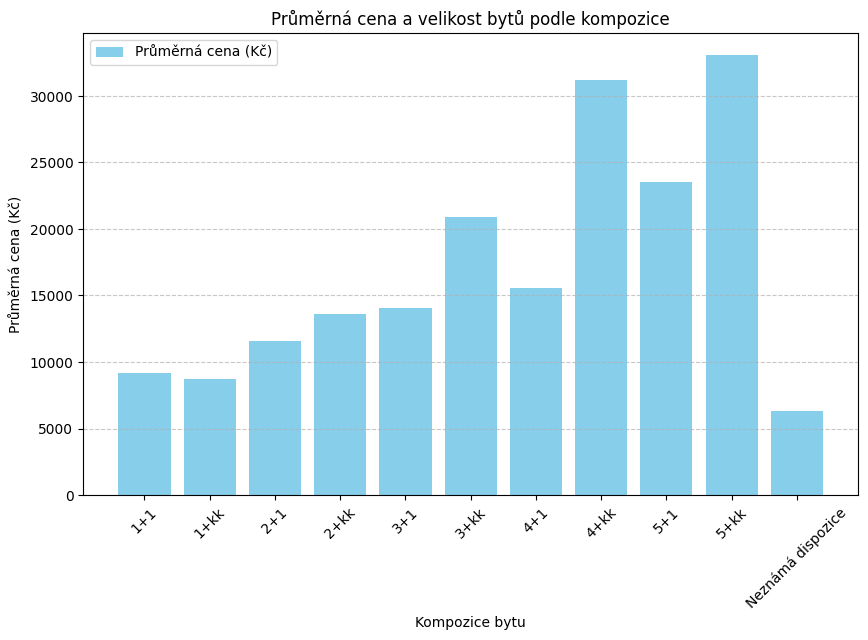

Graf uložen jako C:/reality/prumerna_cena_velikost_kompozice_vylepseny.png


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Funkce pro načtení a přípravu dat
def nacti_data(soubor):
    try:
        print(f"Načítám data ze souboru: {soubor}")
        data = pd.read_csv(soubor)
        print("Data načtena. Prvních 5 řádků:")
        print(data.head())

        # Extrakce velikosti bytu v m² ze sloupce 'Kompozice'
        data['Velikost'] = data['Kompozice'].apply(
            lambda x: int(re.search(r'(\d+)\s?m²', x).group(1)) if pd.notnull(x) and re.search(r'(\d+)\s?m²', x) else None
        )

        # Přidání jednotky m² pro čitelnost
        data['Velikost_s_jednotkou'] = data['Velikost'].apply(
            lambda x: f"{x} m²" if pd.notnull(x) else "N/A"
        )

        # Extrakce pouze dispozice (1+1, 2+kk, atd.) ze sloupce 'Kompozice'
        def extrahuj_dispozici(text):
            if pd.notnull(text):
                match = re.search(r'bytu\s([\d\+kk]+)', text)
                return match.group(1) if match else "Neznámá dispozice"
            return None

        data['Kompozice'] = data['Kompozice'].apply(extrahuj_dispozici)

        # Převod ceny na číselný formát (odstranění Kč a formátování)
        data['Cena'] = data['Cena'].apply(
            lambda x: int(re.sub(r'[^\d]', '', x)) if pd.notnull(x) and re.sub(r'[^\d]', '', x).isdigit() else None
        )

        print("Zpracování dat dokončeno. Prvních 5 řádků po úpravě:")
        print(data.head())
        return data
    except Exception as e:
        print(f"Chyba při načítání nebo zpracování dat: {e}")
        return None

# Funkce pro výpočet průměrné ceny a velikosti podle kompozice
def vypocet_agregace(data):
    print("Vypočítávám průměrnou cenu a velikost podle kompozice...")
    agregace = data.groupby('Kompozice').agg(
        Průměrná_cena=('Cena', 'mean'),
        Průměrná_velikost=('Velikost', 'mean')
    ).round(2).reset_index()
    agregace['Průměrná_velikost'] = agregace['Průměrná_velikost'].astype(str) + ' m²'
    print("Agregace dokončena. Prvních 5 řádků:")
    print(agregace.head())
    return agregace

# Funkce pro identifikaci nejdražších lokalit
def nejdrazsi_lokality(data, pocet=5):
    print(f"Identifikuji {pocet} nejdražších lokalit...")
    lokality = data.groupby('Lokalita')['Cena'].mean().nlargest(pocet).round(2).reset_index()
    print("Nejdražší lokality:")
    print(lokality)
    return lokality

# Funkce pro vykreslení grafu
def vykresli_graf(agregace, soubor_grafu):
    print("Vykresluji graf...")
    plt.figure(figsize=(10, 6))
    plt.bar(agregace['Kompozice'], agregace['Průměrná_cena'], color='skyblue', label='Průměrná cena (Kč)')
    plt.title('Průměrná cena a velikost bytů podle kompozice')
    plt.xlabel('Kompozice bytu')
    plt.ylabel('Průměrná cena (Kč)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.legend()
    plt.savefig(soubor_grafu)
    plt.show()
    print(f"Graf uložen jako {soubor_grafu}")

# Hlavní funkce
def hlavni(soubor, vystup_agg, vystup_lokality, vystup_graf):
    data = nacti_data(soubor)
    if data is None:
        print("Data nebyla načtena. Ukončuji program.")
        return

    # Průměrná cena všech bytů
    prumerna_cena = data['Cena'].mean()
    print(f"Průměrná cena bytů: {prumerna_cena:.2f} Kč")
    
    # Výpočet agregace a zobrazení
    agregace = vypocet_agregace(data)
    
    # Uložení výsledků
    agregace.to_csv(vystup_agg, index=False)
    print(f"Agregace uložena do souboru: {vystup_agg}")
    
    # Nejdražší lokality
    lokality = nejdrazsi_lokality(data)
    lokality.to_csv(vystup_lokality, index=False)
    print(f"Nejdražší lokality uloženy do souboru: {vystup_lokality}")
    
    # Vykreslení grafu
    vykresli_graf(agregace, vystup_graf)

# Spuštění programu
if __name__ == "__main__":
    hlavni(
        soubor="C:/reality/byty_ostrava_pronajem_opraveno.csv",
        vystup_agg="C:/reality/analyza_vysledky_vylepsene.csv",
        vystup_lokality="C:/reality/nejdrazsi_lokality.csv",
        vystup_graf="C:/reality/prumerna_cena_velikost_kompozice_vylepseny.png"
    )

